### Summary of Data

I obtained my data using two methods. The first was via the food2fork recipe data API. The second was using Beautiful Soup to scrape additional data fields from the AllRecipes website.

My dataset consists of 24 variables, with roughly 1,400 observations. Each observation represents one recipe. Recipes are limited to those for baked goods; specifically, pie, cookies, scones, muffins, brownies and cake. I did this by filtering my dataset to include only recipes that contain sugar as an ingredient. 

The target variable is rating, as represented by the average rating from AllRecipes.

One risk is that 

Variable|Description|Variable Type|Data Type
-|-|-|-
name|name of recipe|text|string
num_reviews|number of reviews|continuous|int
nut_cals|calories per serving|continuous|int
nut_carb|carbohydrates per serving|continuous|int
nut_choles|cholesterol per serving|continuous|int
nut_fat|fat per serving|continuous|int
nut_prot|protein per serving|continuous|int
nut_sod|sodium per serving|continuous|int
rating|average rating of recipe|continuous|float
social_rank|'social rank' of recipe as determined by food2fork|continuous|float (0-100)
recipe_id| ID of recipe|continuous|int


In additional to the original data fields, I created the following features:

Variable|Description|Variable Type|Data Type
-|-|-|-   
ratio_sugar_flour|ratio of sugar to dry ingredients|continuous|float
ratio_fat_flour|ratio of sugar to dry ingredients|continuous|float
pos_adj|indicates presence of positive adjective in recipe name|categorical|binary
health_adj|indicates presence of health-related adjective in recipe name|categorical|binary
recipe_type|recipe category|categorical|string


### Summary of Analysis

For this analysis I used the pandas, pylab, and numpy libraries in Python. I also used statsmodels. I used statsmodels to fit a logistic regression with 'admit' as the response variable and gre, gpa and prestige as predictor variables.

### Data Processing

The data from the API was returned in json format as a list of dictionaries. I converted this data to csv format and imported it as a pandas dataframe. The data scraped from AllRecipes was structured as a list. I converted the list to a dataframe and joined the two dataframes to create master dataset.

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
%matplotlib inline

In [3]:
df=pd.read_csv('/Users/ranaquadri/Documents/recipe/recipe_master.csv')

In [4]:
df.drop(['title','recipe_id'], axis=1, inplace=True)

In [21]:
# Check for missing values

total = df.isnull().sum().sort_values(ascending=False)
pct = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, pct], axis=1, keys=['Total', 'Percent'])
missing_data.loc[missing_data['Total'] > 0]

,Total,Percent
ratio_sugar_flour,369,0.288958
ratio_fat_flour,348,0.272514


In [20]:
# Drop observations with missing rating and/or nutritional info
df = df[pd.notnull(df['rating'])]
df = df[pd.notnull(df['nut_cals'])]
print len(df)

1277


In [13]:
# Drop 4 observations where rating <2
df[df.rating < 2].count()

df = df.drop(df[df.rating < 2].index)

In [14]:
# Drop observations with > 5K reviews
df[df.num_reviews > 5000].count()

df = df.drop(df[df.num_reviews>5000].index)

In [15]:
# Set to null 56 observations where ratio sugar_flour >5. 
df[df.ratio_sugar_flour > 5].count()
df.loc[df.ratio_sugar_flour > 5, 'ratio_sugar_flour'] = np.nan
df.loc[df.ratio_fat_flour > 5, 'ratio_fat_flour'] = np.nan

In [35]:
# Set data types of variables
df['pos_adj']=df['pos_adj'].astype('bool');
df['health_adj']=df['health_adj'].astype('bool');
df['nut_sod']=df['nut_sod'].astype('int');
df['nut_choles']=df['nut_choles'].astype('int');
df['num_reviews']=df['num_reviews'].astype('int');

In [36]:
# Create bins for rating in order to use neural network
df['rat_cat']=pd.cut(df['rating'], bins=4, labels=False)

In [88]:
df_cluster=df_cluster[df_cluster.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]

In [22]:
df.describe()

,num_reviews,nut_cals,nut_carb,nut_choles,nut_fat,nut_prot,nut_sod,rating,social_rank,sugar,fat,dry,ratio_sugar_flour,ratio_fat_flour,rat_cat
count,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,908.000000,929.000000,1277.000000
mean,146.249021,311.635082,43.565388,42.334377,14.256852,4.083007,244.179327,4.311261,50.995329,1.423340,0.706170,1.650777,0.807999,0.413127,2.589663
std,342.294925,171.283606,23.302222,40.064918,10.117947,2.157440,147.639838,0.413452,19.321319,1.181937,0.720715,1.628936,0.728880,0.463235,0.613960
min,1.000000,36.000000,5.000000,0.000000,0.000000,0.000000,1.000000,2.000000,34.807777,0.020000,0.000000,0.000000,0.009804,0.000000,0.000000
25%,19.000000,181.000000,27.000000,16.000000,7.000000,3.000000,138.000000,4.140000,36.853905,0.667000,0.250000,0.000000,0.333333,0.180000,2.000000
50%,49.000000,274.000000,39.000000,31.000000,12.000000,4.000000,222.000000,4.420000,42.841119,1.000000,0.500000,1.500000,0.581111,0.285714,3.000000
75%,126.000000,404.000000,56.000000,58.000000,19.000000,5.000000,310.000000,4.590000,57.170514,2.000000,1.000000,2.500000,1.000000,0.500000,3.000000
max,4411.000000,1213.000000,222.000000,308.000000,68.000000,15.000000,1419.000000,5.000000,100.000000,9.000000,15.000000,15.000000,4.166667,5.000000,3.000000


In [23]:
df['recipe_type'].value_counts()

cake        434
muffins     260
cookies     149
pie         140
other       131
brownies    114
scones       49
Name: recipe_type, dtype: int64

In [ ]:
### Data Visualization

# Scatterplot of ratio sugar/flour vs rating
df.plot.scatter(x='rating', y='ratio_sugar_flour')

# Scatterplot of ratio sugar/flour vs rating
df.plot.scatter(x='rating', y='ratio_fat_flour')

# Scatterplot of ratio sugar/flour vs rating
df.plot.scatter(x='rating', y='num_reviews')

# Scatterplot of ratio sugar/flour vs rating
df.plot.scatter(x='rating', y='nut_cals')

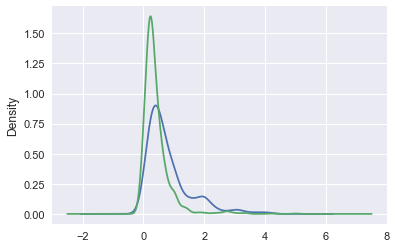

In [211]:
# plot the distribution of each variable 
df["ratio_sugar_flour"].plot(kind="density")
df["ratio_fat_flour"].plot(kind="density")

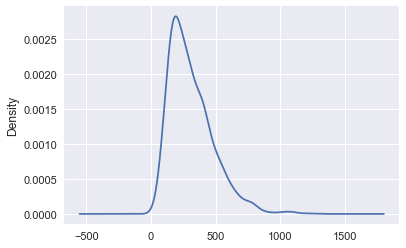

In [212]:
df["nut_cals"].plot(kind="density")

In [37]:
df_cluster=df[['num_reviews','nut_cals','nut_carb','nut_choles','nut_fat','nut_prot','nut_sod','social_rank',
             'sugar','fat','dry','recipe_type']]

In [169]:
df_cluster['rec_type'] = df['recipe_type'].map({'other':0, 'cookies': 1, 'cake':2, 'scones':3, 'pie':4, 'brownies':5, 'snickerdoodles':1,'muffins':7})

In [207]:
df_cluster.drop(['recipe_type'], axis=1, inplace=True)


Text(0.5,1,u'Positive Adjective vs Rating')

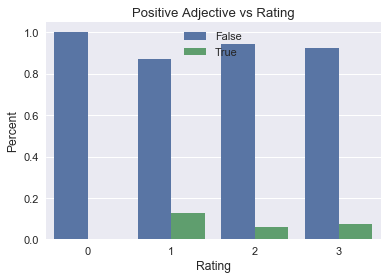

In [195]:
ct=pd.crosstab(df.rat_cat, df.pos_adj).apply(lambda r: r/r.sum(), axis=1)
stacked = ct.stack().reset_index().rename(columns={0:'value'})
 # plot grouped bar chart
sn.barplot(x=stacked.rat_cat, y=stacked.value, hue=stacked.pos_adj)
plt.legend(loc='upper center')
plt.xlabel("Rating")
plt.ylabel("Percent")
plt.title("Positive Adjective vs Rating")

Text(0.5,1,u'Health Adjective vs Rating')

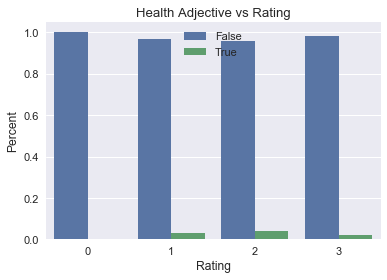

In [194]:
ct=pd.crosstab(df.rat_cat, df.health_adj).apply(lambda r: r/r.sum(), axis=1)
stacked = ct.stack().reset_index().rename(columns={0:'value'})
 # plot grouped bar chart
sn.barplot(x=stacked.rat_cat, y=stacked.value, hue=stacked.health_adj)
plt.legend(loc='upper center')
plt.xlabel("Rating")
plt.ylabel("Percent")
plt.title("Health Adjective vs Rating")

In [ ]:
print df['rating'].describe()
print("Skewness: {0:0.3f}".format(df['rating'].skew()))
print("Kurtosis: {0:0.3f}".format(df['rating'].kurt()))

In [ ]:
# Correlation map
f, ax = plt.subplots(figsize=(9,9))
sns.heatmap(df.corr(), vmin=-1, vmax=+1)

In [91]:
from sklearn.preprocessing import StandardScaler
df_cluster1 = StandardScaler().fit_transform(df_cluster)

Text(0.5,1,u'Clusters found by KMeans')

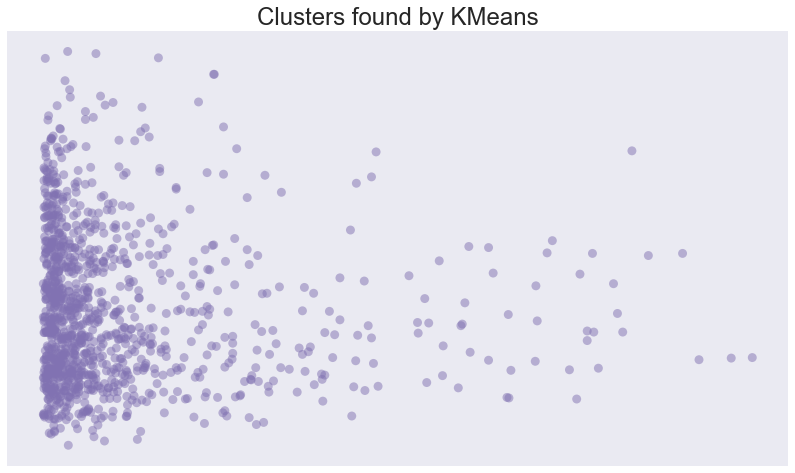

In [92]:
#KMeans
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}

from sklearn.cluster import KMeans
km_cluster_model = KMeans(n_clusters=6, random_state=1)
km_cluster_model.fit(df_cluster)
labels = km_cluster_model.predict(df_cluster1)


palette = sns.color_palette('deep', np.unique(labels).max() + 1)
colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
plt.figure(figsize=(14,8))
plt.scatter(df_cluster1.T[0], df_cluster1.T[1], c=colors, **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)
plt.title('Clusters found by {}'.format(str(KMeans.__name__)), fontsize=24)

In [99]:
df_cluster["cluster"] = labels
df_cluster = pd.concat([df_cluster, pd.get_dummies(df_cluster['cluster'], prefix="cluster")], axis=1)
df_cluster.head()

,num_reviews,nut_cals,nut_carb,nut_choles,nut_fat,nut_prot,nut_sod,social_rank,sugar,fat,dry,rec_type,cluster,cluster_3,cluster_3
1,77,203.0,38.0,1,6.0,6.0,397,48.322452,0.50,0.12,1.5,7,3,1,1
2,131,348.0,58.0,1,13.0,2.0,373,48.982783,1.00,0.50,0.0,0,3,1,1
3,43,298.0,57.0,1,7.0,3.0,311,47.725361,0.25,0.08,0.0,0,3,1,1
4,317,159.0,30.0,1,3.0,2.0,310,99.757903,0.13,0.00,0.0,2,3,1,1
5,7,157.0,36.0,1,1.0,3.0,280,55.851281,0.08,0.00,0.0,0,3,1,1


In [48]:
import statsmodels.formula.api as smf

lm = smf.ols(formula='rating ~ pos_adj+health_adj+nut_prot+num_reviews+ratio_sugar_flour+recipe_type', data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     7.646
Date:                Sun, 18 Mar 2018   Prob (F-statistic):           1.04e-12
Time:                        09:49:54   Log-Likelihood:                -468.61
No. Observations:                 908   AIC:                             961.2
Df Residuals:                     896   BIC:                             1019.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  4.0716      0.061     66.646      0.000       3.952       4.192
pos_adj[T.True]           -0.0355      0.055     -0.650      0.516      -0.143       0.072
health_adj[T.True]        -0.0559      0.074     -0.754      0.451      -0.201       0.090
recipe_type[T.cake]        0.1287      0.052      2.495      0.013       0.027       0.230
recipe_type[T.cookies]     0.1289      0.061      2.129      0.034       0.010       0.248
recipe_type[T.muffins]     0.1651      0.054      3.052      0.002       0.059       0.271
recipe_type[T.other]       0.1361      0.064      2.124      0.034       0.010       0.262
recipe_type[T.pie]         0.2628      0.064      4.131      0.000       0.138       0.388
recipe_type[T.scones]      0.1864      0.078      2.395      0.017       0.034       0.339
nut_prot                  -0.0157      0.007     -2.190      0.029      -0.030      -0.002
num_reviews                0.0002   3.69e-05      6.535      0.000       0.000       0.000
ratio_sugar_flour          0.0984      0.023      4.230      0.000       0.053       0.144
==============================================================================
Omnibus:                      202.985   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              403.698
Skew:                          -1.280   Prob(JB):                     2.18e-88
Kurtosis:                       5.028   Cond. No.                     3.88e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
cols_to_keep=['num_reviews','nut_cals','nut_carb','nut_choles','nut_fat','nut_prot','nut_sod','social_rank',
             'sugar','fat','dry', 'pos_adj','health_adj']

(array([   8.,    0.,    0.,   62.,    0.,    0.,  376.,    0.,    0.,  831.]),
 array([ 0. ,  0.3,  0.6,  0.9,  1.2,  1.5,  1.8,  2.1,  2.4,  2.7,  3. ]),
 <a list of 10 Patch objects>)

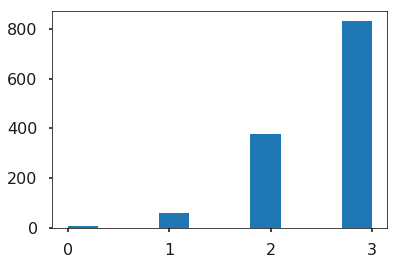

In [50]:
plt.hist(df['rat_cat'])


In [133]:
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(df[cols_to_keep], df['rat_cat'])

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(X_train.shape)
print(y_train.shape)

(957, 13)
(957, 4)


In [134]:
import numpy as np
np.unique(y_train)

array([ 0.,  1.])

In [145]:
model = Sequential()

n_input = X_train.shape[1]
n_hidden = n_input
n_output = 4

model.add(Dense(n_hidden, input_dim=n_input, activation='relu'))
model.add(Dense(n_output, activation='softmax'))

In [146]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [147]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                    epochs=400, batch_size=None, verbose=0)

In [148]:
history.history['acc'][-1]

0.29676071052267261

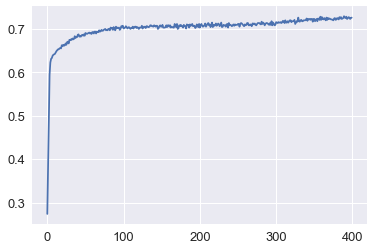

In [139]:
plt.plot(history.history['acc'])

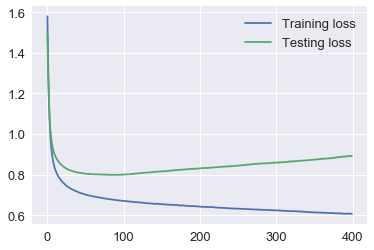

In [140]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']
plt.plot(train_loss, label='Training loss')
plt.plot(test_loss, label='Testing loss')
plt.legend()

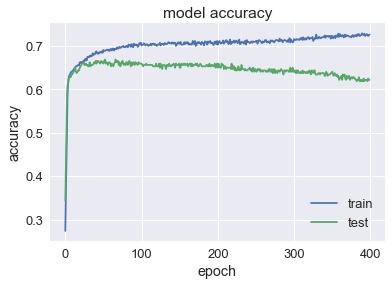

In [141]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

In [142]:
score = model.evaluate(X_test, y_test, verbose=0)
print score

[0.89327254295349123, 0.62187499999999996]


In [131]:
y_pred = model.predict(X_test)


In [132]:
y_test_non_category = [ np.argmax(t) for t in y_test ]
y_predict_non_category = [ np.argmax(t) for t in y_pred ]

from sklearn.metrics import confusion_matrix, precision_score,recall_score
conf_mat = confusion_matrix(y_test_non_category, y_predict_non_category)

print conf_mat

[[  0   1   0   1]
 [  0   1  14   2]
 [  1   3  34  54]
 [  0   2  47 160]]


In [120]:
precision_score(y_test_non_category, y_predict_non_category,average="micro")

0.609375

In [121]:
# Recall
recall_score(y_test_non_category, y_predict_non_category,average="micro")

0.609375

Text(0.5,1,u'Confusion Matrix for Neural Network')

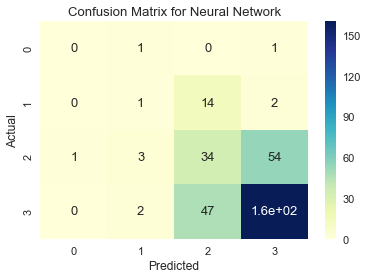

In [156]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

       
df_cm = pd.DataFrame(conf_mat, range(4),
                  range(4))
sn.set(font_scale=1.1)
sn.heatmap(df_cm, annot=True,annot_kws={"size": 13},cmap="YlGnBu")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Neural Network") 